# Exploratory Data Analysis (EDA) for Safety Observations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "Observations_Raw.xlsx"
excel_data = pd.ExcelFile(file_path)

# Load the 'ACTIVE Cards' sheet
df = excel_data.parse('ACTIVE Cards')

# Clean column names
df.columns = [col.strip().replace('\n', ' ').replace('\r', ' ').replace('  ', ' ') for col in df.columns]
df.head()


,Timestamp,Email Address,Type of reporting,Observation,Unit/Area (for example U deck stbd side),Name(Enter first name only),Department or Company,Did this involve any intervention from you or any one? Interventions include : *Calling Stop Work /TOFS *Taking a break to reassess a situation *Correcting someone to do the right thing *Teaching or coaching someone about a task,Name made proper,Name/Company,Date,Hour of day,Comapny key,type key
0,2023-07-15 15:15:58.070,ericlarbi@tenaris.com,Pro ACTIVE (Positive Observtion),Very good hand placement by the roustabout cre...,Pipe deck,Eric larbi - FSS,Tenaris,No,Eric Larbi - Fss,Eric Larbi - Fss/Tenaris,07/15/2023,15,_Tenaris,_Pro ACTIVE (Positive Observtion)
1,2023-07-15 15:24:43.274,ericlarbi@tenaris.com,Pro ACTIVE (Positive Observtion),I commend a Roughneck working at the AUX rig f...,Rig floor,Eric larbi - FSS,Tenaris,No,Eric Larbi - Fss,Eric Larbi - Fss/Tenaris,07/15/2023,15,_Tenaris,_Pro ACTIVE (Positive Observtion)
2,2023-07-15 16:11:42.543,mostert.attie@gmail.com,Pro ACTIVE (Positive Observtion),I observed Halliburton filtration personnel pe...,Pipe deck,Attie Mostert,Expro,No,Attie Mostert,Attie Mostert/Expro,07/15/2023,16,_Expro,_Pro ACTIVE (Positive Observtion)
3,2023-07-15 17:35:11.727,adjeiameyaw1974@gmail.com,Pro ACTIVE (Positive Observtion),Good TBT session was conducted with all possib...,Pipe deck,Nana Ameyaw Adjei - Filtration Trainee,Halliburton Filtration,No,Nana Ameyaw Adjei - Filtration Trainee,Nana Ameyaw Adjei - Filtration Trainee /Hallib...,07/15/2023,17,_Halliburton Filtration,_Pro ACTIVE (Positive Observtion)
4,2023-07-15 17:37:41.720,darre.carroll@technipfmc.com,Pro ACTIVE (Positive Observtion),Excellent job by Expro. TBT in place prior to ...,TFMC area,Darren Carroll TFMC,TechnipFMC,No,Darren Carroll Tfmc,Darren Carroll Tfmc/TechnipFMC,07/15/2023,17,_TechnipFMC,_Pro ACTIVE (Positive Observtion)


In [2]:
# Add text length column
df['Text Length'] = df['Observation'].astype(str).apply(len)

# Simplify type of reporting to Safe, Unsafe, Other
def classify_type(report_type):
    if 'unsafe' in report_type.lower() or 'reactive' in report_type.lower():
        return 'Unsafe'
    elif 'pro active' in report_type.lower():
        return 'Safe'
    else:
        return 'Other'

df['Label'] = df['Type of reporting'].apply(classify_type)
df['Label'].value_counts()


Label
Safe      7161
Other      591
Unsafe     118
Name: count, dtype: int64

In [3]:
# Check intervention column name
intervention_col = [col for col in df.columns if 'intervention' in col.lower()][0]
df[intervention_col].value_counts()


Did this involve any intervention from you or any one?  Interventions include : *Calling Stop Work /TOFS *Taking a break to reassess a situation *Correcting someone to do the right thing *Teaching or coaching someone about a task
No      6236
Yes     1628
True       6
Name: count, dtype: int64

In [4]:
# Summary stats by label
text_length_stats = df.groupby('Label')['Text Length'].describe()
text_length_stats


,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
Other,591.0,188.697124,98.102306,29.0,128.0,168.0,223.0,718.0
Safe,7161.0,161.880464,78.060378,3.0,111.0,149.0,198.0,961.0
Unsafe,118.0,209.330508,101.514266,4.0,149.0,191.0,246.0,657.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_29584\3151230585.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_29584\3151230585.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Label', y='Text Length', palette='Set3')


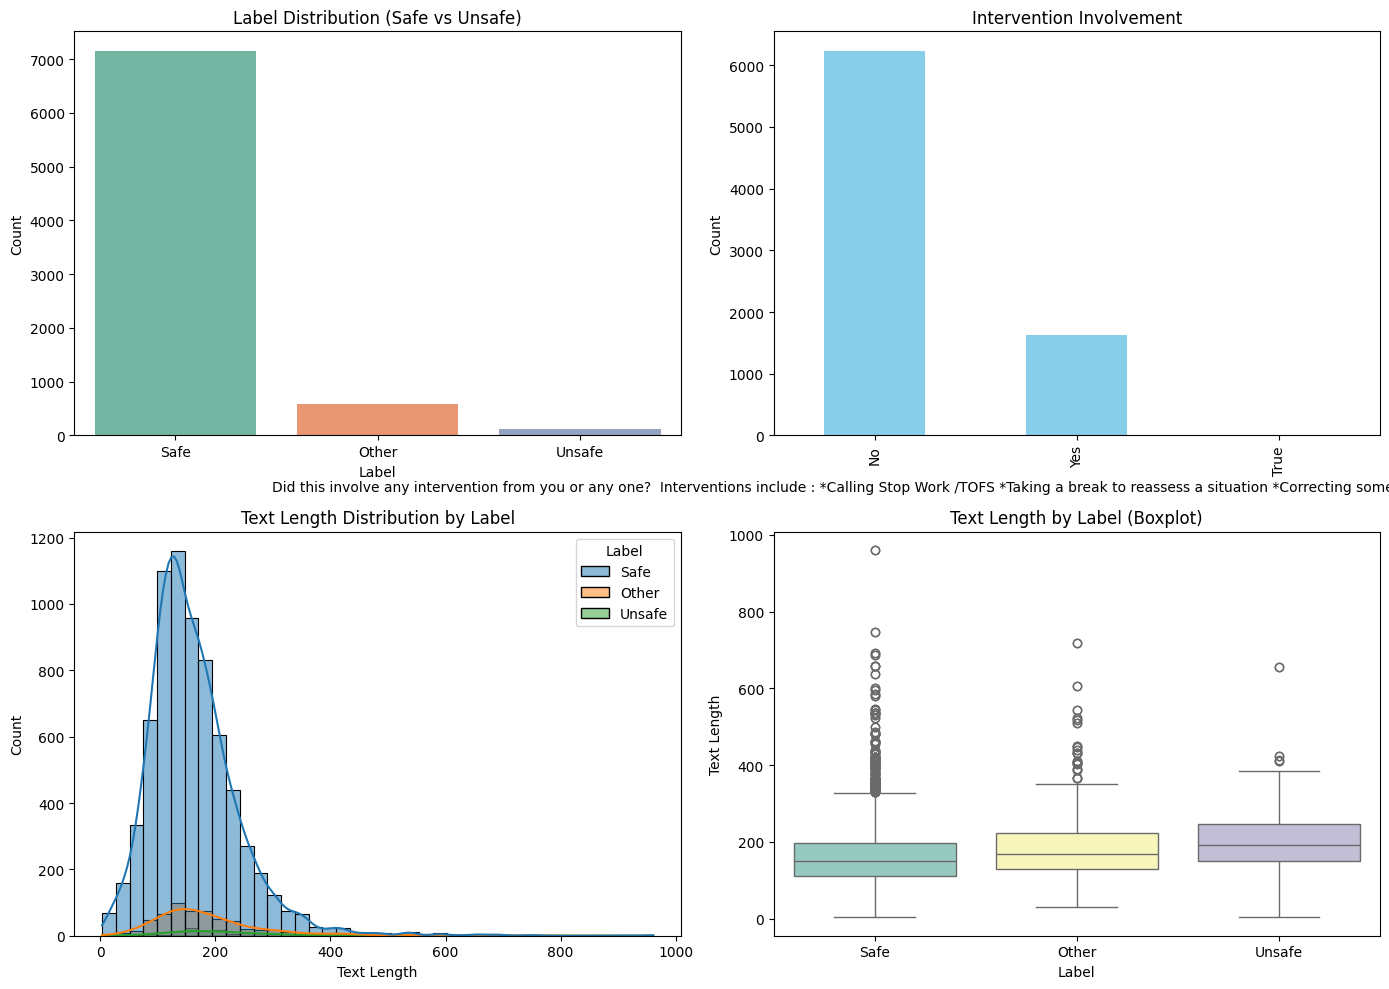

In [5]:
plt.figure(figsize=(14, 10))

# 1. Label distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Label', palette='Set2')
plt.title('Label Distribution (Safe vs Unsafe)')
plt.ylabel('Count')

# 2. Intervention distribution
plt.subplot(2, 2, 2)
df[intervention_col].value_counts().plot(kind='bar', color='skyblue')
plt.title('Intervention Involvement')
plt.ylabel('Count')

# 3. Text length distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Text Length', hue='Label', bins=40, kde=True)
plt.title('Text Length Distribution by Label')

# 4. Boxplot of text length
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Label', y='Text Length', palette='Set3')
plt.title('Text Length by Label (Boxplot)')

plt.tight_layout()
plt.show()
